# Description

This notebook shows how to integrate models into a pipeline for fast text prediction. 

The basic process goes:

1. Create your models with the desired parameters (random/grid search is not enabled, so you need to know your best parameters beforehand). you models should include some kind of text vectorizer and a classifier. We use TfidfVectorizer, and a number of different classifiers. 

2. Pass your models, data (X and y) into a ConstructModel class to create a pipeline. The pipeline will automatically fit your pipeline on initialization. (Note: you can choose to fit the data on train, test, or all in the ConstructModel parameters). 

3. Once the model is trained, you have a number of options for viewing the results and making predictions. Those are detailed below. 

In [14]:
%load_ext autoreload
%autoreload 1

import sys
sys.path.append("../utils")

from construct_model import *
from text_pre_processor import *

%aimport construct_model
%aimport text_pre_processor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
with open('../data/interim/text_target.pkl', 'rb') as f:
    text_target = pickle.load(f)
    
X = text_target.cleaned_text
y = text_target.target

# Model Initialization

In [36]:
vec = TfidfVectorizer()
lr = LogisticRegression(random_state=42)

lr_model = ConstructModel([vec, lr], X, y)

# Model Evaluation 

You can easily get the train and test accuracy scores of the model with `.get_score`

In [37]:
lr_model.get_score()

Train Score:	 0.8858545439544573
Test Score:	 0.8120772149810263


You can also quickly create visuals for confusion matrices and AUC/ROC curves using `get_confusion_matrix` and `get_roc` methods respectively. 

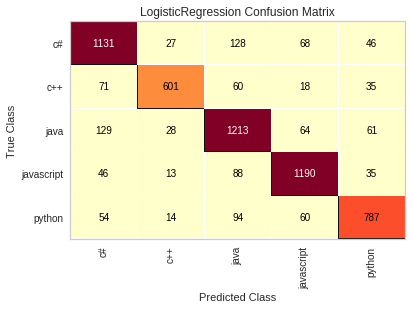

In [38]:
lr_model.get_confusion_matrix()

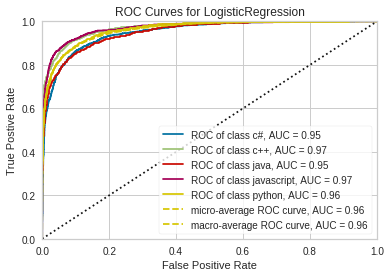

In [39]:
lr_model.get_roc()

# Making new predictions

So make a new prediction, simply input a new string and all the preprocessing will be handled for you. 

The default output is a single prediction as a string.

In [40]:
lr_model.get_prediction(
    "Here is some text I would like to predict. This is about python. What if I say something like pip", )

array(['python'], dtype=object)

An alternative output is `'proba'`, which will display the probabilities calculated for each classification. 

In [41]:
lr_model.get_prediction("This string is more ambiguous. What will the model think it is about?", format='proba')

[('c#', 0.28337814672658956),
 ('c++', 0.05078245010747262),
 ('java', 0.20450162779902997),
 ('javascript', 0.0961254909240462),
 ('python', 0.36521228444286163)]